In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
df = pd.read_csv("rain-agriculture.csv")

# Sort by State and Year for correct rolling calculation

In [4]:
df_sorted = df.sort_values(by=["State Name", "Year"]).copy()

# Calculate 3-year moving average for Rice Yield per state

In [5]:
df_sorted["Rice_Yield_MA3"] = (
    df_sorted.groupby("State Name")["RICE YIELD (Kg per ha)"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Displaying Andhra Pradesh first 10 rows

In [6]:
print(df_sorted[df_sorted["State Name"] == "andhra pradesh"]
      [["Year", "RICE YIELD (Kg per ha)", "Rice_Yield_MA3"]]
      .head(10))

   Year  RICE YIELD (Kg per ha)  Rice_Yield_MA3
0  1966             1345.728182     1345.728182
1  1967             1337.355455     1341.541818
2  1968             1212.896364     1298.660000
3  1969             1268.754545     1273.002121
4  1970             1361.693636     1281.114848
5  1971             1637.841818     1422.763333
6  1972             1523.512727     1507.682727
7  1973             1611.992727     1591.115758
8  1974             1579.006364     1571.503939
9  1975             1614.084545     1601.694545


# Ploting for a chosen state

In [7]:
state = "andhra pradesh"
state_data = df_sorted[df_sorted["State Name"] == state]

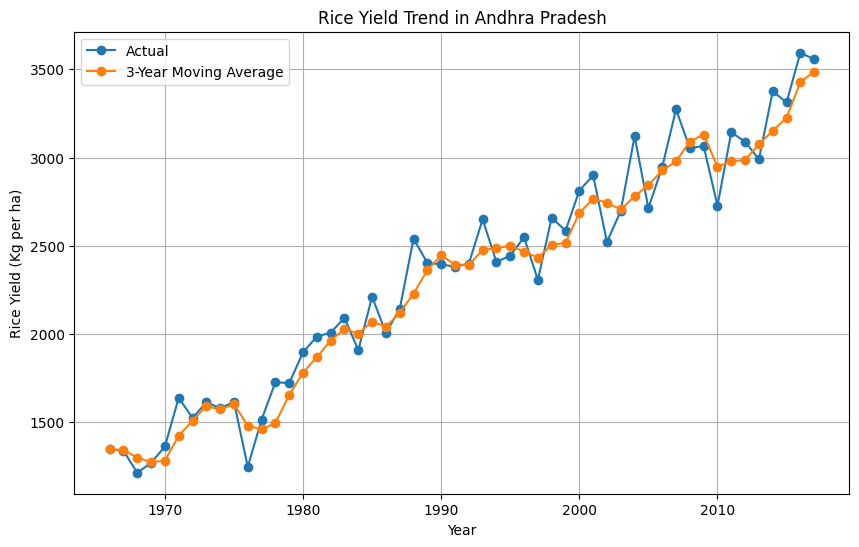

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(state_data["Year"], state_data["RICE YIELD (Kg per ha)"], label="Actual", marker="o")
plt.plot(state_data["Year"], state_data["Rice_Yield_MA3"], label="3-Year Moving Average", marker="o")
plt.title(f"Rice Yield Trend in {state.title()}")
plt.xlabel("Year")
plt.ylabel("Rice Yield (Kg per ha)")
plt.legend()
plt.grid(True)
plt.show()